In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score #Confusion matrix 수업 때 진행할 예정 
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
import matplotlib.pyplot as plt
import os

### actionOption 리스트

In [186]:
dict_num_to_kor = {
    "111": "Sleep",
    "112": "Sleepless",
    "121": "Meal",
    "122": "Snack",
    "131": "Medical services, treatments, sick rest",
    "132": "Personal hygiene (bath)",
    "133": "Appearance management (makeup, change of clothes)",
    "134": "Beauty-related services",
    "211": "Main job",
    "212": "Side job",
    "213": "Rest during work",
    "22": "Job search",
    "311": "School class / seminar (listening)",
    "312": "Break between classes",
    "313": "School homework, self-study (individual)",
    "314": "Team project (in groups)",
    "321": "Private tutoring (offline)",
    "322": "Online courses",
    "41": "Preparing food and washing dishes",
    "42": "Laundry and ironing",
    "43": "Housing management and cleaning",
    "44": "Vehicle management",
    "45": "Pet and plant caring",
    "46": "Purchasing goods and services (grocery/take-out)",
    "51": "Caring for children under 10 who live together",
    "52": "Caring for elementary, middle, and high school students over 10 who live together",
    "53": "Caring for a spouse",
    "54": "Caring for parents and grandparents who live together",
    "55": "Caring for other family members who live together",
    "56": "Caring for parents and grandparents who do not live together",
    "57": "Caring for other family members who do not live together",
    "81": "Personal care-related travel",
    "82": "Commuting and work-related travel",
    "83": "Education-related travel",
    "84": "Travel related to housing management",
    "85": "Travel related to caring for family and household members",
    "86": "Travel related to participation and volunteering",
    "87": "Socializing and leisure-related travel",
    "61": "Religious activities",
    "62": "Political activity",
    "63": "Ceremonial activities",
    "64": "Volunteer",
    "711": "Offline communication",
    "712": "Video or voice call",
    "713": "Text or email (Online)",
    "721": "Reading books, newspapers, and magazines",
    "722": "Watching TV or video",
    "723": "Listening to audio",
    "724": "Internet search or blogging",
    "725": "Gaming (mobile, computer, video)",
    "741": "Watching a sporting event",
    "742": "Watching movie",
    "743": "Concerts and plays",
    "744": "Art galleries and museums",
    "745": "Amusement Park, zoo",
    "746": "Driving, sightseeing, excursion",
    "751": "Walking",
    "752": "Running, jogging",
    "753": "Climbing, hiking",
    "754": "Biking",
    "755": "Ball games (soccer, basketball, baseball, tennis, etc)",
    "756": "Personal exercises (yoga, pilates, etc)",
    "757": "Camping, fishing",
    "761": "Group games (board games, card games, puzzles, etc)",
    "762": "Personal hobbies (woodworking, gardening, etc)",
    "763": "Group performances (orchestra, choir, troupe, etc)",
    "764": "Liberal arts and learning (languages, musical instruments, etc)",
    "791": "Nightlife",
    "792": "Smoking",
    "793": "Do nothing and rest",
    "91": "Online shopping",
    "92": "Offline shopping",
    'wakeupduration': 'wakeupduration',
    'lightsleepduration': 'lightsleepduration',
    'remsleepduration': 'remsleepduration',
    'deepsleepduration': 'deepsleepduration', 
    'wakeupcount': 'wakeupcount', 'durationtosleep':'durationtosleep',
       'durationtowakeup': 'durationtowakeup', 'hr_average': 'hr_average', 'hr_min': 'hr_min', 'hr_max':  'hr_max', 'rr_average': 'rr_average',
       'rr_min':'rr_min', 'rr_max':'rr_max', 'breathing_disturbances_intensity': 'breathing_disturbances_intensity', 'snoring': 'snoring',
       'snoringepisodecount': 'snoringepisodecount'}

# 2020 action-sleep 데이터 만드는 코드
- 2020년의 actionOption데이터와 2020년 user sleep data를 합침.

In [8]:
action_list =[111, 112, 121, 122, 131, 132, 133, 134, 211, 212, 213, 22, 311, 312, 313, 314, 321, 322, 41, 42, 43, 44, 45, 46, 51, 52, 53, 54, 55, 56, 57, 81, 82, 83, 84, 85, 86,
              87, 61, 62, 63, 64, 711, 712, 713, 721, 722, 723, 724, 725, 741, 742, 743, 744, 745, 746, 751, 752, 753, 754, 755, 756, 761, 762, 763, 764, 791, 792, 793, 91, 92]
DIRNAME =sorted(os.listdir('jw_data/label_date/'))
SLEEP_DIRNAME = sorted(os.listdir('jw_data/user_sleep_data/'))

action_option = []
for i in range(len(DIRNAME)):
    if DIRNAME[i] == '.ipynb_checkpoints':
        continue
    else:
        base_dir1 = 'jw_data/label_date/'+DIRNAME[i]
        base_dir2 = 'jw_data/user_sleep_data/'+SLEEP_DIRNAME[i]
        label_data = pd.read_csv(base_dir1)
        sleep_data = pd.read_csv(base_dir2)
        datelist = sorted(label_data['date'].unique())
        df =pd.get_dummies(label_data['actionOption'])
        
       
        action_df = pd.DataFrame(columns= action_list)
        score = sleep_data[['date','sleep_score','wakeupduration', 'lightsleepduration', 'remsleepduration',
                   'deepsleepduration', 'wakeupcount', 'durationtosleep',
                    'durationtowakeup', 'hr_average', 'hr_min',
                   'hr_max', 'rr_average', 'rr_min', 'rr_max',
                   'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount',
                   ]]
        #print(score.head(3))
        print("-------", f"{DIRNAME[i]}", "------------------------------------")
        for j in range(len(datelist)):
            action = pd.DataFrame(data = label_data[label_data['date'] == datelist[j]][-180:], columns =['date','actionOption'])
            
            action_num_list = action['actionOption'].unique() # 해당 날짜에 수행한 action 리스트
            #print(action_num_list)
            date = action['date'].unique()
            date_action_dict = dict(zip(date, [action_num_list])) # 날짜와 해당하는 action
            for date, action in date_action_dict.items():
                action_df.loc[date, action] = 1
               
        action_df = action_df.fillna(0)
        
    
        score.set_index('date', inplace=True)
       
        action_df = action_df.reset_index(drop=True)
        score = score.reset_index(drop=True)
        #print(action_df.head(2))
        
        merged_df = pd.concat([action_df, score], axis=1, join='inner')
        merged_df.to_csv('jw_data/2020action-sleep/'+f"{DIRNAME[i]}")


------- user01.csv ------------------------------------
------- user02.csv ------------------------------------
------- user03.csv ------------------------------------
------- user04.csv ------------------------------------
------- user05.csv ------------------------------------
------- user06.csv ------------------------------------
------- user07.csv ------------------------------------
------- user08.csv ------------------------------------
------- user09.csv ------------------------------------
------- user10.csv ------------------------------------
------- user11.csv ------------------------------------
------- user12.csv ------------------------------------
------- user21.csv ------------------------------------
------- user22.csv ------------------------------------
------- user23.csv ------------------------------------
------- user24.csv ------------------------------------
------- user25.csv ------------------------------------
------- user26.csv -----------------------------

In [10]:
import os
import pandas as pd

DIRNAME = sorted(os.listdir('jw_data/2020action-sleep/'))
dfs = []
for i in range(len(DIRNAME)):
    if DIRNAME[i] == '.ipynb_checkpoints':
        continue
    else:
        base_dir1 = 'jw_data/2020action-sleep/'+DIRNAME[i]
        action_label_data = pd.read_csv(base_dir1)
        dfs.append(action_label_data)
   

merged_dfs = pd.concat(dfs, ignore_index=False) 
merged_dfs.to_csv('jw_data/2020action-sleep.csv')

In [11]:
actionOption = pd.read_csv('jw_data/2020action-sleep.csv')

In [12]:
actionOption.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '111', '112', '121', '122', '131', '132',
       '133', '134', '211', '212', '213', '22', '311', '312', '313', '314',
       '321', '322', '41', '42', '43', '44', '45', '46', '51', '52', '53',
       '54', '55', '56', '57', '81', '82', '83', '84', '85', '86', '87', '61',
       '62', '63', '64', '711', '712', '713', '721', '722', '723', '724',
       '725', '741', '742', '743', '744', '745', '746', '751', '752', '753',
       '754', '755', '756', '761', '762', '763', '764', '791', '792', '793',
       '91', '92', 'sleep_score', 'wakeupduration', 'lightsleepduration',
       'remsleepduration', 'deepsleepduration', 'wakeupcount',
       'durationtosleep', 'durationtowakeup', 'hr_average', 'hr_min', 'hr_max',
       'rr_average', 'rr_min', 'rr_max', 'breathing_disturbances_intensity',
       'snoring', 'snoringepisodecount'],
      dtype='object')

In [13]:
actionOption.head()

,Unnamed: 0.1,Unnamed: 0,111,112,121,122,131,132,133,134,...,durationtowakeup,hr_average,hr_min,hr_max,rr_average,rr_min,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount
0,0,0,0,0,1,0,0,0,0,0,...,0,69,57,83,16,12,25,18,8880,16
1,1,1,0,0,0,0,0,0,0,0,...,0,73,63,82,16,12,22,20,8280,16
2,2,2,0,0,1,0,0,0,0,0,...,0,73,58,84,17,9,22,17,8400,7
3,3,3,0,0,0,1,0,0,0,0,...,0,72,64,80,16,11,24,20,11400,11
4,4,4,0,0,0,0,0,0,0,0,...,0,72,60,85,16,12,21,14,5280,5


In [198]:
col=actionOption.columns[0:-1]
X=actionOption[col]
X=X.drop(['total_sleep_time', 'lightsleepduration', 'remsleepduration','deepsleepduration','sleep_score'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=actionOption['sleep_classes']

In [199]:
X.head()

,111,112,121,122,131,132,133,134,211,212,...,durationtowakeup,hr_average,hr_min,hr_max,rr_average,rr_min,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.600000,0.487179,0.62,0.363636,0.4,0.6875,0.197917,0.637931,0.615385
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.714286,0.641026,0.60,0.363636,0.4,0.5000,0.218750,0.594828,0.615385
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.714286,0.512821,0.64,0.454545,0.1,0.5000,0.187500,0.603448,0.269231
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.685714,0.666667,0.56,0.363636,0.3,0.6250,0.218750,0.818966,0.423077
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.685714,0.564103,0.66,0.363636,0.4,0.4375,0.156250,0.379310,0.192308


In [200]:
X.columns

Index(['111', '112', '121', '122', '131', '132', '133', '134', '211', '212',
       '213', '22', '311', '312', '313', '314', '321', '322', '41', '42', '43',
       '44', '45', '46', '51', '52', '53', '54', '55', '56', '57', '81', '82',
       '83', '84', '85', '86', '87', '61', '62', '63', '64', '711', '712',
       '713', '721', '722', '723', '724', '725', '741', '742', '743', '744',
       '745', '746', '751', '752', '753', '754', '755', '756', '761', '762',
       '763', '764', '791', '792', '793', '91', '92', 'wakeupduration',
       'wakeupcount', 'durationtosleep', 'durationtowakeup', 'hr_average',
       'hr_min', 'hr_max', 'rr_average', 'rr_min', 'rr_max',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount'],
      dtype='object')

1. hr_average (0.08777901221574742)
2. wakeupduration (0.06741913439212255)
3. hr_max (0.06555831375890754)
4. rr_average (0.06434702986694896)
5. hr_min (0.06061637890310776)
6. breathing_disturbances_intensity (0.05769421822784692)
7. durationtosleep (0.05741774910699215)
8. rr_max (0.05447434390386943)
9. rr_min (0.05306776454322184)
10. snoring (0.05159626939173302)
11. snoringepisodecount (0.049823563519705384)
12. wakeupcount (0.040380641881436405)
13. durationtowakeup (0.02579030743956487)
14. Gaming (mobile, computer, video) (0.015788737898814017)
15. Meal (0.014404740846908664)
16. Side job (0.013180810585080804)
17. Internet search or blogging (0.013138213741881101)
18. Personal hygiene (bath) (0.01251423835866333)
19. Commuting and work-related travel (0.011246126408583725)
20. Sleep (0.01008491469902621)
21. Main job (0.009896181687557536)
22. Watching TV or video (0.009759140427226382)
23. Preparing food and washing dishes (0.008998005036094365)
24. Snack (0.00830748284083

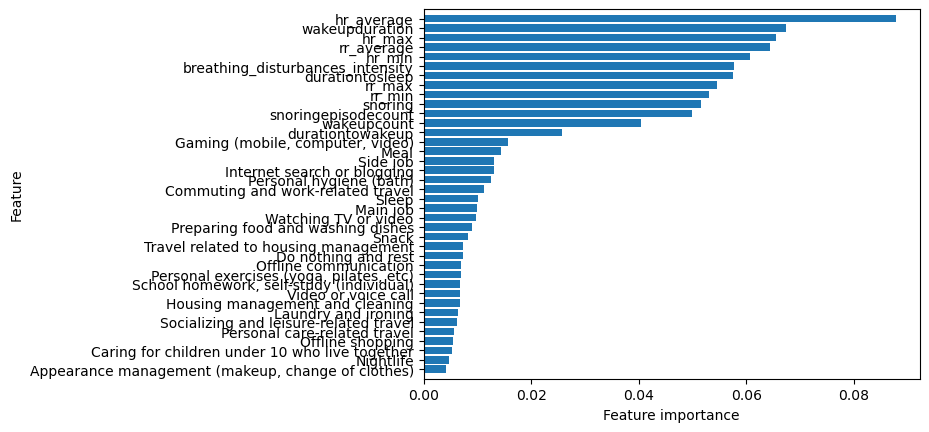

---------------------------------
정확도 :  0.7428571428571429


In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
importances_threshold = 0.004  # 중요도 임계치
selected_rankings = []
for f in range(X_train.shape[1]):
    if importances[indices[f]] >= importances_threshold:
        selected_rankings.append((f + 1, X_train.columns[indices[f]], importances[indices[f]]))
for i, (num, name, score) in enumerate(selected_rankings, 1):
    name = dict_num_to_kor[name]
    print(f"{i}. {name} ({score})")


n_features = len(selected_rankings)
plt.barh(np.arange(n_features), [x[2] for x in selected_rankings[::-1]], align='center')
plt.yticks(np.arange(n_features), [dict_num_to_kor[x[1]] for x in selected_rankings[::-1]])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1, n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

In [202]:
col=actionOption.columns[0:-1]
X=actionOption[col]
X=X.drop(['total_sleep_time', 'remsleepduration','deepsleepduration','sleep_score'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=actionOption['sleep_classes']

In [203]:
X.columns

Index(['111', '112', '121', '122', '131', '132', '133', '134', '211', '212',
       '213', '22', '311', '312', '313', '314', '321', '322', '41', '42', '43',
       '44', '45', '46', '51', '52', '53', '54', '55', '56', '57', '81', '82',
       '83', '84', '85', '86', '87', '61', '62', '63', '64', '711', '712',
       '713', '721', '722', '723', '724', '725', '741', '742', '743', '744',
       '745', '746', '751', '752', '753', '754', '755', '756', '761', '762',
       '763', '764', '791', '792', '793', '91', '92', 'wakeupduration',
       'lightsleepduration', 'wakeupcount', 'durationtosleep',
       'durationtowakeup', 'hr_average', 'hr_min', 'hr_max', 'rr_average',
       'rr_min', 'rr_max', 'breathing_disturbances_intensity', 'snoring',
       'snoringepisodecount'],
      dtype='object')

In [204]:
X.head()

,111,112,121,122,131,132,133,134,211,212,...,durationtowakeup,hr_average,hr_min,hr_max,rr_average,rr_min,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.600000,0.487179,0.62,0.363636,0.4,0.6875,0.197917,0.637931,0.615385
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.714286,0.641026,0.60,0.363636,0.4,0.5000,0.218750,0.594828,0.615385
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.714286,0.512821,0.64,0.454545,0.1,0.5000,0.187500,0.603448,0.269231
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.685714,0.666667,0.56,0.363636,0.3,0.6250,0.218750,0.818966,0.423077
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.685714,0.564103,0.66,0.363636,0.4,0.4375,0.156250,0.379310,0.192308


1. lightsleepduration (0.17296866770067695)
2. hr_average (0.06629117301392749)
3. wakeupduration (0.05695832967844775)
4. hr_max (0.05683268194782394)
5. hr_min (0.05526502872160281)
6. rr_max (0.05304832882414584)
7. durationtosleep (0.04977600845376252)
8. breathing_disturbances_intensity (0.04651964317640797)
9. snoringepisodecount (0.046124626875834414)
10. rr_average (0.044783593013990396)
11. snoring (0.04421467509088955)
12. rr_min (0.04019580856815229)
13. wakeupcount (0.031247518331832435)
14. durationtowakeup (0.019863790609505036)
15. Meal (0.013733790203740517)
16. Gaming (mobile, computer, video) (0.011594686528966168)
17. Internet search or blogging (0.011237305253977238)
18. Personal hygiene (bath) (0.009538897391452628)
19. Sleep (0.009011073673473088)
20. Side job (0.00882999250883169)
21. Commuting and work-related travel (0.007870177721983524)
22. Watching TV or video (0.007770341346703702)
23. Main job (0.007657090722675213)
24. Housing management and cleaning (0.0

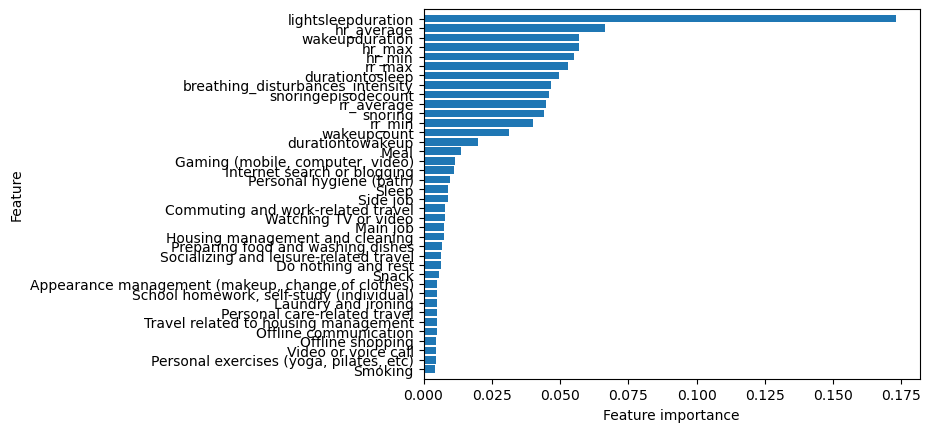

---------------------------------
정확도 :  0.76


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
importances_threshold = 0.004  # 중요도 임계치
selected_rankings = []
for f in range(X_train.shape[1]):
    if importances[indices[f]] >= importances_threshold:
        selected_rankings.append((f + 1, X_train.columns[indices[f]], importances[indices[f]]))
for i, (num, name, score) in enumerate(selected_rankings, 1):
    name = dict_num_to_kor[name]
    print(f"{i}. {name} ({score})")


n_features = len(selected_rankings)
plt.barh(np.arange(n_features), [x[2] for x in selected_rankings[::-1]], align='center')
plt.yticks(np.arange(n_features), [dict_num_to_kor[x[1]] for x in selected_rankings[::-1]])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1, n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)